In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime



In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

In [3]:
%matplotlib inline

In [4]:
covid_ng = pd.read_excel('data/records_covid19.xlsx', parse_dates=['Dates'],sheet_name='experimentation')
deathby_state = pd.read_csv('data/cases16052020.csv')

In [5]:
pd.set_option('display.max_columns', 60)

In [6]:
covid_ng.head()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth
0,2020-02-27 15:40:38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
covid_ng.tail()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth
81,2020-05-11 15:45:49,88,3,64,9,0,6,49,1,0,1,0,0,1,13,0,1,0,1,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,124,7
82,2020-05-12 15:54:38,57,1,27,1,0,1,3,2,9,4,10,0,8,0,0,0,0,1,0,1,3,0,0,2,2,0,0,2,0,4,0,0,0,7,0,1,0,57,8
83,2020-05-13 15:29:08,51,10,14,0,3,0,16,0,1,4,9,0,16,5,0,2,5,10,23,1,1,0,0,4,0,1,0,1,0,3,0,3,0,0,0,1,0,111,6
84,2020-05-14 15:59:42,58,9,46,7,0,5,0,3,3,0,3,0,1,0,0,1,0,0,35,0,0,0,0,0,0,0,0,5,4,0,0,1,0,12,0,0,0,110,3
85,2020-05-15 15:47:22,179,7,8,11,0,0,15,13,1,3,2,0,3,20,4,0,3,0,15,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,4


In [8]:
covid_ng.shape

(86, 40)

In [9]:
covid_ng.columns

Index(['Dates', 'Lagos', 'Abuja(FCT)', 'Kano', 'Ogun', 'Osun', 'Gombe',
       'Katsina', 'Borno', 'Edo', 'Oyo', 'Kwara', 'Akwa Ibom', 'Bauchi',
       'Kaduna', 'Ekiti', 'Ondo', 'Delta', 'Rivers', 'Jigawa', 'Enugu',
       'Niger', 'Abia', 'Zamfara', 'Sokoto', 'Benue', 'Anambra', 'Adamawa',
       'Plateau', 'Imo', 'Kebbi', 'Kogi', 'Nasarawa', 'Taraba', 'Yobe',
       'Bayelsa', 'Ebonyi', 'Cross River', 'Dischared/Revovered', 'Dealth'],
      dtype='object')

In [10]:
exp_wip = covid_ng.copy()

In [11]:
exp_wip.head()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth
0,2020-02-27 15:40:38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#Extract geopolitical zone
exp_wip['South_West'] = exp_wip['Lagos'] + exp_wip['Ondo'] + exp_wip['Osun'] + exp_wip['Oyo'] + \
exp_wip['Ekiti'] + exp_wip['Ogun']

exp_wip['South_South'] = exp_wip['Edo'] + exp_wip['Rivers'] + exp_wip['Delta'] + exp_wip['Cross River'] + \
exp_wip['Bayelsa'] + exp_wip['Akwa Ibom']

exp_wip['South_East'] = exp_wip['Anambra'] + exp_wip['Imo'] + exp_wip['Enugu'] + exp_wip['Abia'] + \
exp_wip['Ebonyi']

exp_wip['North_Central'] = exp_wip['Benue'] + exp_wip['Kogi'] + exp_wip['Nasarawa'] + exp_wip['Niger'] + \
exp_wip['Plateau'] + exp_wip['Kwara']

exp_wip['North_East'] = exp_wip['Adamawa'] + exp_wip['Bauchi'] + exp_wip['Borno'] + exp_wip['Gombe'] + \
exp_wip['Taraba'] + exp_wip['Yobe']

exp_wip['North_West'] = exp_wip['Jigawa'] + exp_wip['Kaduna'] + exp_wip['Kano'] + exp_wip['Katsina'] + \
exp_wip['Kebbi'] + exp_wip['Sokoto'] + exp_wip['Zamfara']


In [13]:
exp_wip.tail()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth,South_West,South_South,South_East,North_Central,North_East,North_West
81,2020-05-11 15:45:49,88,3,64,9,0,6,49,1,0,1,0,0,1,13,0,1,0,1,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,124,7,99,1,0,0,12,127
82,2020-05-12 15:54:38,57,1,27,1,0,1,3,2,9,4,10,0,8,0,0,0,0,1,0,1,3,0,0,2,2,0,0,2,0,4,0,0,0,7,0,1,0,57,8,62,10,2,17,18,36
83,2020-05-13 15:29:08,51,10,14,0,3,0,16,0,1,4,9,0,16,5,0,2,5,10,23,1,1,0,0,4,0,1,0,1,0,3,0,3,0,0,0,1,0,111,6,60,16,3,14,16,65
84,2020-05-14 15:59:42,58,9,46,7,0,5,0,3,3,0,3,0,1,0,0,1,0,0,35,0,0,0,0,0,0,0,0,5,4,0,0,1,0,12,0,0,0,110,3,66,3,4,9,21,81
85,2020-05-15 15:47:22,179,7,8,11,0,0,15,13,1,3,2,0,3,20,4,0,3,0,15,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,4,197,4,0,6,16,58


In [14]:
#format header columns
def clean_col(name):
    return name.strip().lower().replace(" ", "_").replace('/','_')


In [15]:
exp_wip_col_clean = exp_wip.rename(columns=clean_col)

In [16]:
exp_wip_col_clean.head()

,dates,lagos,abuja(fct),kano,ogun,osun,gombe,katsina,borno,edo,oyo,kwara,akwa_ibom,bauchi,kaduna,ekiti,ondo,delta,rivers,jigawa,enugu,niger,abia,zamfara,sokoto,benue,anambra,adamawa,plateau,imo,kebbi,kogi,nasarawa,taraba,yobe,bayelsa,ebonyi,cross_river,dischared_revovered,dealth,south_west,south_south,south_east,north_central,north_east,north_west
0,2020-02-27 15:40:38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
exp_wip_col_clean.rename(columns={'abuja(fct)': 'abuja','dealth':'death','dischared_revovered':'discharged_recovered'}, inplace=True)

In [18]:
exp_wip_col_clean.tail()

,dates,lagos,abuja,kano,ogun,osun,gombe,katsina,borno,edo,oyo,kwara,akwa_ibom,bauchi,kaduna,ekiti,ondo,delta,rivers,jigawa,enugu,niger,abia,zamfara,sokoto,benue,anambra,adamawa,plateau,imo,kebbi,kogi,nasarawa,taraba,yobe,bayelsa,ebonyi,cross_river,discharged_recovered,death,south_west,south_south,south_east,north_central,north_east,north_west
81,2020-05-11 15:45:49,88,3,64,9,0,6,49,1,0,1,0,0,1,13,0,1,0,1,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,124,7,99,1,0,0,12,127
82,2020-05-12 15:54:38,57,1,27,1,0,1,3,2,9,4,10,0,8,0,0,0,0,1,0,1,3,0,0,2,2,0,0,2,0,4,0,0,0,7,0,1,0,57,8,62,10,2,17,18,36
83,2020-05-13 15:29:08,51,10,14,0,3,0,16,0,1,4,9,0,16,5,0,2,5,10,23,1,1,0,0,4,0,1,0,1,0,3,0,3,0,0,0,1,0,111,6,60,16,3,14,16,65
84,2020-05-14 15:59:42,58,9,46,7,0,5,0,3,3,0,3,0,1,0,0,1,0,0,35,0,0,0,0,0,0,0,0,5,4,0,0,1,0,12,0,0,0,110,3,66,3,4,9,21,81
85,2020-05-15 15:47:22,179,7,8,11,0,0,15,13,1,3,2,0,3,20,4,0,3,0,15,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,4,197,4,0,6,16,58


In [19]:
#extract the total daily cases
exp_wip_col_clean['total_daily_cases'] = exp_wip_col_clean['lagos'] + exp_wip_col_clean['abuja'] + \
exp_wip_col_clean['kano'] + exp_wip_col_clean['ogun'] + exp_wip_col_clean['osun'] + \
exp_wip_col_clean['gombe'] + exp_wip_col_clean['katsina'] + exp_wip_col_clean['borno'] + \
exp_wip_col_clean['edo'] + exp_wip_col_clean['oyo'] + exp_wip_col_clean['kwara'] + \
exp_wip_col_clean['akwa_ibom'] + exp_wip_col_clean['kaduna'] + exp_wip_col_clean['ekiti'] + exp_wip_col_clean['ondo'] + \
exp_wip_col_clean['delta'] + exp_wip_col_clean['rivers'] + exp_wip_col_clean['jigawa'] + exp_wip_col_clean['enugu'] + \
exp_wip_col_clean['niger'] + exp_wip_col_clean['abia'] + exp_wip_col_clean['zamfara'] +  exp_wip_col_clean['sokoto'] + \
exp_wip_col_clean['benue'] + exp_wip_col_clean['anambra'] + exp_wip_col_clean['adamawa'] + exp_wip_col_clean['plateau'] + \
exp_wip_col_clean['imo'] + exp_wip_col_clean['kebbi'] + exp_wip_col_clean['kogi'] + exp_wip_col_clean['nasarawa'] + \
exp_wip_col_clean['taraba'] + exp_wip_col_clean['yobe'] + exp_wip_col_clean['bayelsa'] + exp_wip_col_clean['ebonyi'] + \
exp_wip_col_clean['cross_river'] + exp_wip_col_clean['bauchi']

In [20]:
exp_wip_col_clean['total_daily_cases'].tail()

81    242
82    146
83    184
84    193
85    288
Name: total_daily_cases, dtype: int64

In [21]:
exp_wip_col_clean['death'].tail()

81    7
82    8
83    6
84    3
85    4
Name: death, dtype: int64

In [22]:
exp_wip_col_clean.columns

Index(['dates', 'lagos', 'abuja', 'kano', 'ogun', 'osun', 'gombe', 'katsina',
       'borno', 'edo', 'oyo', 'kwara', 'akwa_ibom', 'bauchi', 'kaduna',
       'ekiti', 'ondo', 'delta', 'rivers', 'jigawa', 'enugu', 'niger', 'abia',
       'zamfara', 'sokoto', 'benue', 'anambra', 'adamawa', 'plateau', 'imo',
       'kebbi', 'kogi', 'nasarawa', 'taraba', 'yobe', 'bayelsa', 'ebonyi',
       'cross_river', 'discharged_recovered', 'death', 'south_west',
       'south_south', 'south_east', 'north_central', 'north_east',
       'north_west', 'total_daily_cases'],
      dtype='object')

In [23]:
# implement tidy data principles; melt individual states into one column:'states' 
#and geopolitical zone into 'zones'
tidy_covid1 = exp_wip_col_clean.melt(id_vars=['dates','discharged_recovered', 'death','total_daily_cases','south_west','south_south', 'south_east', 'north_central','north_east','north_west'], 
                                   value_vars=['lagos', 'abuja', 'kano', 'ogun', 'osun', 'gombe', 'katsina','borno', 'edo', 'oyo', 'kwara', 'akwa_ibom', 'bauchi', 'kaduna','ekiti', 'ondo', 'delta', 'rivers', 'jigawa', 'enugu', 'niger', 'abia','zamfara', 'sokoto', 'benue', 'anambra', 'adamawa', 'plateau', 'imo','kebbi', 'kogi', 'nasarawa', 'taraba', 'yobe', 'bayelsa', 'ebonyi','cross_river'],
                                   var_name='states', value_name='cases_state')

In [24]:
tidy_covid1.head()

,dates,discharged_recovered,death,total_daily_cases,south_west,south_south,south_east,north_central,north_east,north_west,states,cases_state
0,2020-02-27 15:40:38,0,0,1,1,0,0,0,0,0,lagos,1
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,lagos,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,lagos,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,lagos,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,lagos,0


In [25]:
#collapse zones into one column
tidy_covid_all = tidy_covid1.melt(id_vars=['dates','discharged_recovered', 'death','total_daily_cases','states','cases_state'], value_vars=['south_west','south_south', 'south_east', 'north_central','north_east','north_west'],
                                 var_name='geopolitical_zones', value_name='cases_zones')

In [26]:
tidy_covid_all.tail()

,dates,discharged_recovered,death,total_daily_cases,states,cases_state,geopolitical_zones,cases_zones
19087,2020-05-11 15:45:49,124,7,242,cross_river,0,north_west,127
19088,2020-05-12 15:54:38,57,8,146,cross_river,0,north_west,36
19089,2020-05-13 15:29:08,111,6,184,cross_river,0,north_west,65
19090,2020-05-14 15:59:42,110,3,193,cross_river,0,north_west,81
19091,2020-05-15 15:47:22,140,4,288,cross_river,0,north_west,58


###  Average Daily Cases By Geopolitical Zone

In [27]:
tidy_covid_all['geopolitical_zones'].unique()

array(['south_west', 'south_south', 'south_east', 'north_central',
       'north_east', 'north_west'], dtype=object)

In [28]:
average_zones_cases = tidy_covid_all.groupby('geopolitical_zones').agg({'cases_zones':'mean'}).reset_index()

In [29]:
average_zones_cases

,geopolitical_zones,cases_zones
0,north_central,1.523256
1,north_east,7.069767
2,north_west,17.941860
3,south_east,0.372093
4,south_south,2.023256
5,south_west,29.976744


In [30]:
sns.set(style='whitegrid')

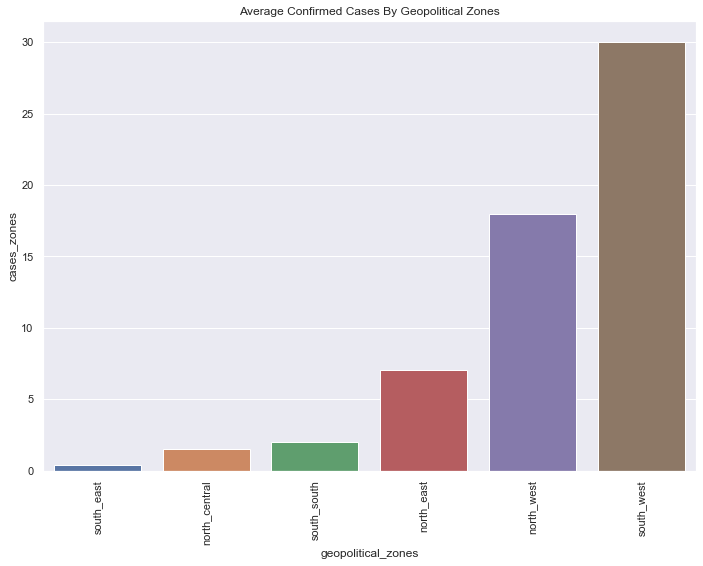

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='geopolitical_zones', y='cases_zones', data=average_zones_cases, order=['south_east','north_central','south_south','north_east','north_west','south_west']);
ax.set_title('Average Confirmed Cases By Geopolitical Zones')
plt.xticks(rotation=90)
plt.show()

### Monthly  Case Fatality Rate And Mortality Rate

In [32]:
month_fatality = exp_wip_col_clean[['dates', 'death', 'total_daily_cases', 'discharged_recovered']]

In [33]:
#set dates as index
month_fatality_index = month_fatality.set_index('dates')
month_fatality_index.head()

,death,total_daily_cases,discharged_recovered
dates,,,
2020-02-27 15:40:38,0,1,0
2020-02-28 01:00:36,0,0,0
2020-02-29 02:26:52,0,0,0
2020-03-01 22:44:08,0,0,0
2020-03-02 11:53:02,0,0,0


In [34]:
#group cases into months
month_fatality_index_group = month_fatality_index.resample('M').agg({'death': 'sum', 'total_daily_cases':'sum','discharged_recovered':'sum'}).reset_index()
month_fatality_index_group.head()

,dates,death,total_daily_cases,discharged_recovered
0,2020-02-29,0,1,0
1,2020-03-31,2,137,9
2,2020-04-30,56,1791,310
3,2020-05-31,113,3523,1001


In [35]:
#case fatality and mortality calculation
month_fatality_index_group['case_fatality'] = month_fatality_index_group['death'] / month_fatality_index_group['total_daily_cases']
month_fatality_index_group['mortality_rate'] = month_fatality_index_group['death']/1000
month_fatality_index_group['month'] = month_fatality_index_group['dates'].dt.month

In [36]:
month_fatality_index_group.head()

,dates,death,total_daily_cases,discharged_recovered,case_fatality,mortality_rate,month
0,2020-02-29,0,1,0,0.000000,0.000,2
1,2020-03-31,2,137,9,0.014599,0.002,3
2,2020-04-30,56,1791,310,0.031267,0.056,4
3,2020-05-31,113,3523,1001,0.032075,0.113,5


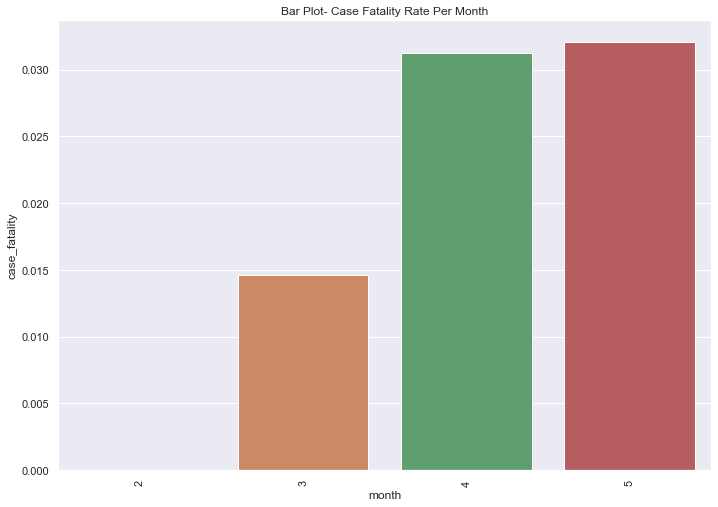

In [37]:
#visualize monthly fatality rate
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='case_fatality', data=month_fatality_index_group)
ax.set_title('Bar Plot- Case Fatality Rate Per Month')
plt.xticks(rotation = 90)
plt.show()


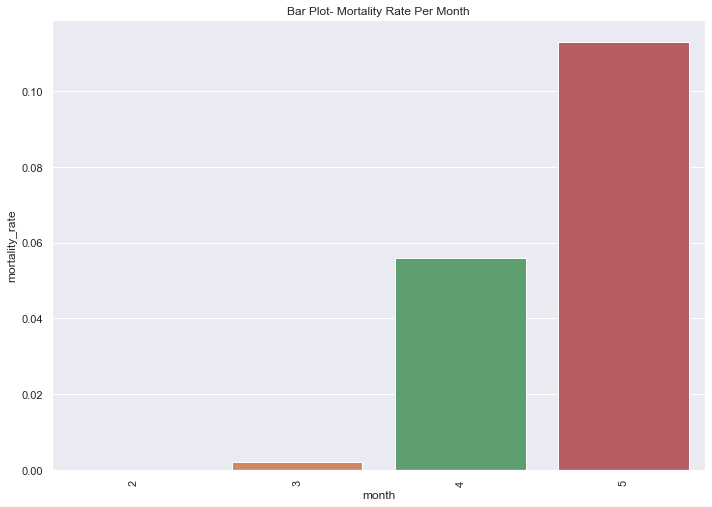

In [38]:
#visualize Mortality rate
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='mortality_rate', data=month_fatality_index_group)
ax.set_title('Bar Plot- Mortality Rate Per Month')
plt.xticks(rotation = 90)
plt.show()


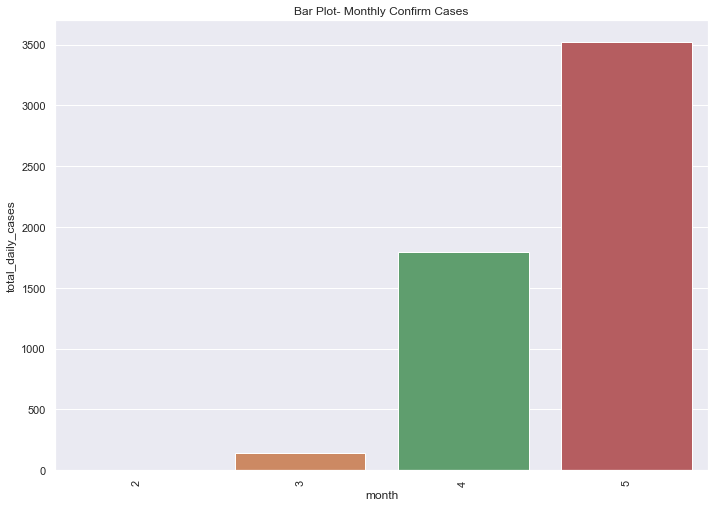

In [39]:
# Monthly confirmed cases
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='total_daily_cases', data=month_fatality_index_group)
ax.set_title('Bar Plot- Monthly Confirm Cases')
plt.xticks(rotation = 90)
plt.show()

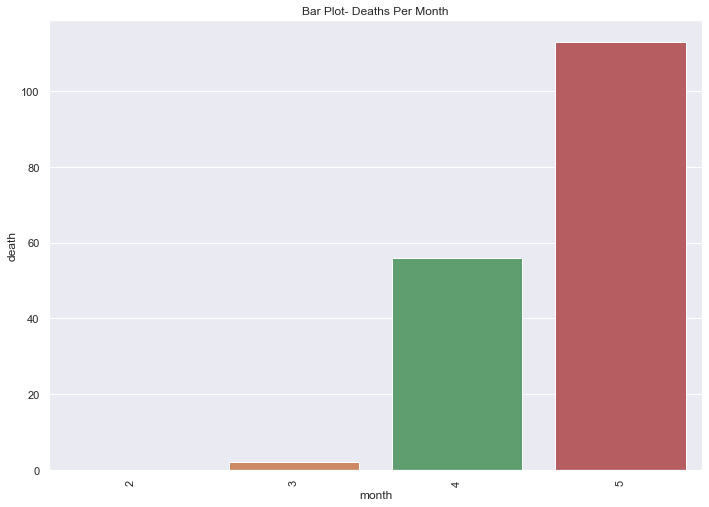

In [40]:
#Monthly Deaths
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='death', data=month_fatality_index_group)
ax.set_title('Bar Plot- Deaths Per Month')
plt.xticks(rotation = 90)
plt.show()

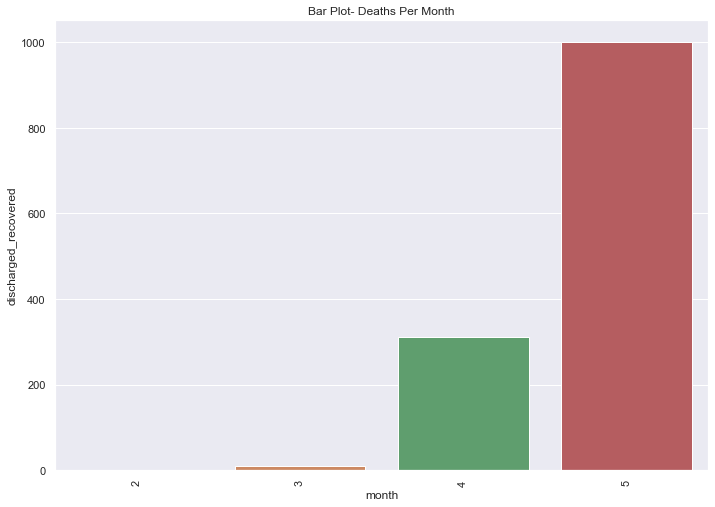

In [41]:
#Number of Recoveries by Month
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='discharged_recovered', data=month_fatality_index_group)
ax.set_title('Bar Plot- Deaths Per Month')
plt.xticks(rotation = 90)
plt.show()

### Death By States

In [42]:
deathby_state.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"2,278","1,701",541,36
1,Kano,761,638,90,33
2,FCT,386,291,88,7
3,Katsina,239,198,29,12
4,Bauchi,210,166,41,3


In [43]:
state_stats = deathby_state.groupby('States Affected').agg({'No. Discharged':'max', 'No. of Deaths':'max'}).reset_index()
state_stats.head()

,States Affected,No. Discharged,No. of Deaths
0,Abia,1,0
1,Adamawa,11,0
2,Akwa Ibom,12,2
3,Anambra,1,0
4,Bauchi,41,3


In [60]:
deaths_stats = state_stats[['States Affected','No. of Deaths']].sort_values('No. of Deaths', ascending=False)
deaths_stats.head()

,States Affected,No. of Deaths
22,Lagos,36
18,Kano,33
7,Borno,20
31,Sokoto,13
19,Katsina,12


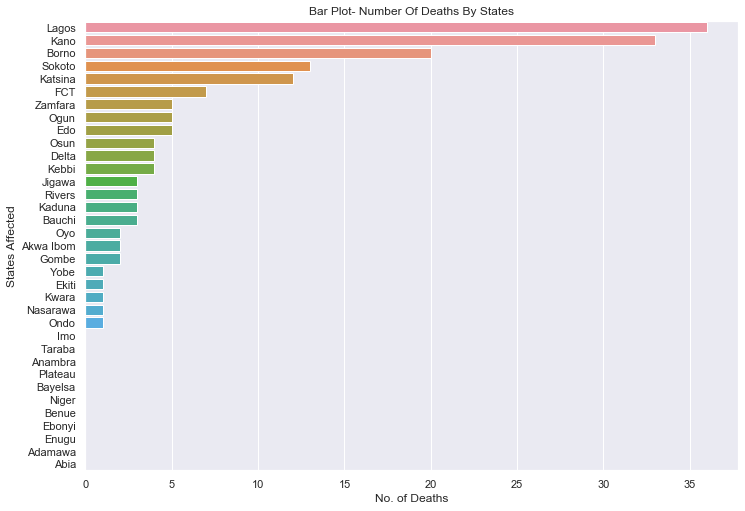

In [63]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='No. of Deaths', y='States Affected', data=deaths_stats)
ax.set_title('Bar Plot- Number Of Deaths By States')
#plt.yticks(rotation=90)
plt.show()

### Recoveries/Discharged By States

In [57]:
discharged_stats = state_stats[['No. Discharged', 'States Affected']].sort_values('No. Discharged',ascending=False)
discharged_stats.head()

,No. Discharged,States Affected
22,541,Lagos
18,90,Kano
14,90,Gombe
13,88,FCT
25,59,Ogun


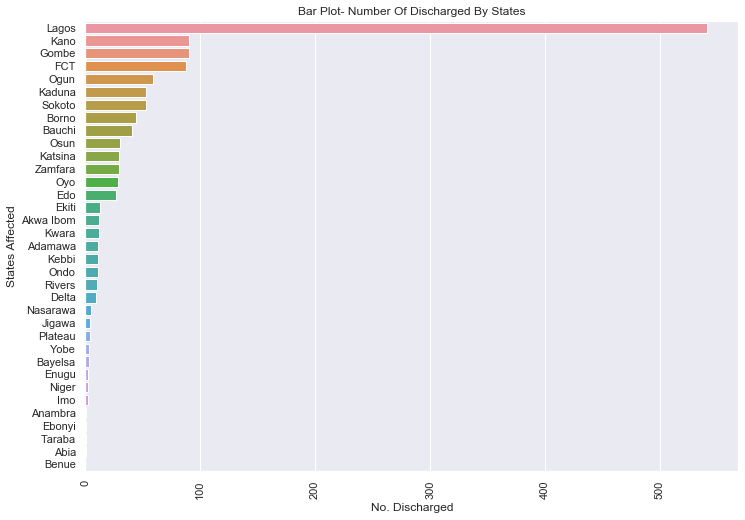

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='No. Discharged',y='States Affected', data=discharged_stats)
ax.set_title('Bar Plot- Number Of Discharged By States')
plt.xticks(rotation=90)
plt.show()

### Predicting the Epidemic Situation of Covid19 In Nigeria with Logistic Mathematical Model
My choice of the Logistic Model is simply because it is simple and it conform to the statistical law of Epidemiology

In [67]:
#extract the data we need for building the Logistic Model
model_data = exp_wip_col_clean[['dates', 'death','total_daily_cases']]
model_data.head()

,dates,death,total_daily_cases
0,2020-02-27 15:40:38,0,1
1,2020-02-28 01:00:36,0,0
2,2020-02-29 02:26:52,0,0
3,2020-03-01 22:44:08,0,0
4,2020-03-02 11:53:02,0,0


In [77]:
# daily_cases_data = model_data[['dates', 'total_daily_cases']]
# FMT = '%Y-%m-%d %H:%M:%S'
# date = daily_cases_data['dates']
# daily_cases_data['dates'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01 00:00:00", FMT)).days)

# daily_cases_data.head()

In [69]:
daily_death_data = model_data[['dates', 'death']]
daily_death_data.head()

,dates,death
0,2020-02-27 15:40:38,0
1,2020-02-28 01:00:36,0
2,2020-02-29 02:26:52,0
3,2020-03-01 22:44:08,0
4,2020-03-02 11:53:02,0


#### Modeling Daily cases


In [ ]:
df = df.loc[:,['data','totale_casi']]
FMT = '%Y-%m-%d %H:%M:%S'
date = df['data']
df['dates'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01 00:00:00", FMT)).days  )